# Next Word Prediction:

### Importing The Required Libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:


file = open("/content/metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("initial line: ", lines[0])
print("final line : ", lines[-1])

initial line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

final line :  first to get up and stretch out her young body.


### Cleaning the data:

In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)
print("It helps in replacing the text file in code understandable format by replacing spaces") 
print("")
print("") 
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:200]

It helps in replacing the text file in code understandable format by replacing spaces




'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could s'

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation))
#map punctuation to space
new_data = data.translate(translator)

new_data[:-150]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he thought   It wasn t a dream   His room  a proper human room although a little too small  lay peacefully between its four familiar walls   A collection of textile samples lay spread out on the table   Samsa was a travelling salesman   and above it there hung a picture that he had recently cut out of an illustrated magazine and housed in a nice  gilded frame   It showed a lady fitted out with a fur hat and fur boa who sat upright  raising a heavy fur muff that covered the whole of her lower arm 

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:5000]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room although too small, peacefully between its four familiar walls. A collection textile samples spread out table - travelling salesman above there hung picture that had recently cut an illustrated magazine housed nice, gilded frame. showed lady fitted fur hat boa who sat upright, raising heavy muff covered whole her lower arm towards viewer. then turned look window at dull weather. Drops rain be heard hitting pane, which made him feel quite sad. "How I sleep bit longer forget all this nonsense", thou

### Tokenization:

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print("the vocabulary_size")
print(vocab_size)

the vocabulary_size
2617


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model:

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             26170     
                                                                 
 lstm_2 (LSTM)               (None, 1, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


### Plot The Model:

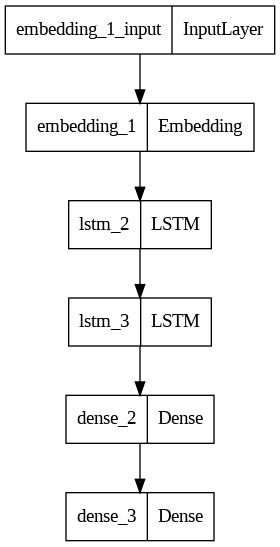

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

### Callbacks:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile The Model:

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

### Fit The Model:

In [29]:


model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 7.8754
Epoch 1: loss improved from inf to 7.87543, saving model to nextword1.h5
61/61 [==============================] - 29s 385ms/step - loss: 7.8754 - lr: 0.0010
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 7.8603
Epoch 2: loss improved from 7.87543 to 7.86032, saving model to nextword1.h5
61/61 [==============================] - 25s 412ms/step - loss: 7.8603 - lr: 0.0010
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 7.8125
Epoch 3: loss improved from 7.86032 to 7.81253, saving model to nextword1.h5
61/61 [==============================] - 24s 392ms/step - loss: 7.8125 - lr: 0.0010
Epoch 4/150
61/61 [==============================] - ETA: 0s - loss: 7.6779
Epoch 4: loss improved from 7.81253 to 7.67793, saving model to nextword1.h5
61/61 [==============================] - 24s 389ms/step - loss: 7.6779 - lr: 0.0010
Epoch 5/150
61/61 [==============================] - ETA

## Observation:
### We are able to develop a decent next word prediction model and are able to get a declining loss and an overall decent performance.

### Creating the Prediction Script:

In [31]:
# Importing the Libraries

from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer

model = load_model('/content/nextword1.h5')
tokenizer = pickle.load(open('/content/tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):
    """
        In this function we are using the tokenizer and models trained
        and we are creating the sequence of the text entered and then
        using our model to predict and return the the predicted word.
    
    """
    for i in range(3):
        sequence = tokenizer.texts_to_sequences([text])[0]
        sequence = np.array(sequence)
        
        preds = np.argmax(model.predict(sequence), axis=1)
#         print(preds)
        predicted_word = ""
        
        for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break
        
        print(predicted_word)
        return predicted_word

In [33]:
"""
    We are testing our model and we will run the model
    until the user decides to stop the script.
    While the script is running we try and check if 
    the prediction can be made on the text. If no
    prediction can be made we just continue.

"""

# text1 = "at the dull"
# text2 = "collection of textile"
# text3 = "what a strenuous"
# text4 = "stop the script"

while(True):

    text = input("Enter your line: ")
    
    if text == "stop the script":
        print("Ending The Program.....")
        break
    
    else:
        # try:
        text = text.split(" ")
        text = text[-1]

        text = ''.join(text)
        Predict_Next_Words(model, tokenizer, text)
            
        # except:
        #     continue

Enter your line: hurriedly
1/1 [==============================] - 0s 47ms/step
thinking
Enter your line: enunciating very
1/1 [==============================] - 0s 30ms/step
carefully
Enter your line: his thoughts to any sensible
1/1 [==============================] - 0s 29ms/step
conclusions
Enter your line: shuffled
1/1 [==============================] - 0s 28ms/step
away
Enter your line: swinging the entire length
1/1 [==============================] - 0s 34ms/step
time
Enter your line: stop the script
Ending The Program.....
